### Chroma multimodal: https://docs.trychroma.com/guides/multimodal 

In [ ]:
# %pip install --upgrade chromadb
# %pip install pillow
# %pip install open-clip-torch
# %pip install tqdm
# %pip install matplotlib
# %pip install pandas


In [1]:
import chromadb 
import pandas as pd
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction 
from chromadb.utils.data_loaders import ImageLoader
from matplotlib import pyplot as plt 

In [2]:
chroma_client = chromadb.PersistentClient(path='chroma_vectordb')

image_loader = ImageLoader()
multimodal_ef = OpenCLIPEmbeddingFunction()
multimodal_db = chroma_client.get_or_create_collection(name="real_estate_mmdb", embedding_function=multimodal_ef, data_loader=image_loader)

/Users/smsalahuddinkadir/Documents/Projects/ML/fellowship/.conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

column_names = ['num_bedrooms', 'num_bathrooms', 'area', 'zipcode', 'price']
df = pd.read_csv('./houses_dataset/Houses Dataset/HousesInfo.txt', delimiter=' ', header=None, names=column_names)

In [4]:
print(df.head(5))

   num_bedrooms  num_bathrooms  area  zipcode   price
0             4            4.0  4053    85255  869500
1             4            3.0  3343    36372  865200
2             3            4.0  3923    85266  889000
3             5            5.0  4022    85262  910000
4             3            4.0  4116    85266  971226


In [21]:
total_num_houses = 535
ids = []
uris = []
metadatas = []
for i in range(total_num_houses):
    ids.append(str(i))
    uris.append('houses_dataset/Houses Dataset/' + str(i+1) + '_frontal.jpg')
    metadatas.append(
            {
                'number_of_bedrooms': int(df.iloc[i, 0]), 
                'number_of_bathrooms': int(df.iloc[i, 1]), 
                'area': int(df.iloc[i, 2]),
                'zipcode': int(df.iloc[i, 3]),
                'price': int(df.iloc[i, 4])
            }        
    )

In [23]:
print(ids[:10])
print(uris[:10])
print(metadatas[:10])

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
['houses_dataset/Houses Dataset/1_frontal.jpg', 'houses_dataset/Houses Dataset/2_frontal.jpg', 'houses_dataset/Houses Dataset/3_frontal.jpg', 'houses_dataset/Houses Dataset/4_frontal.jpg', 'houses_dataset/Houses Dataset/5_frontal.jpg', 'houses_dataset/Houses Dataset/6_frontal.jpg', 'houses_dataset/Houses Dataset/7_frontal.jpg', 'houses_dataset/Houses Dataset/8_frontal.jpg', 'houses_dataset/Houses Dataset/9_frontal.jpg', 'houses_dataset/Houses Dataset/10_frontal.jpg']
[{'number_of_bedrooms': 4, 'number_of_bathrooms': 4, 'area': 4053, 'zipcode': 85255, 'price': 869500}, {'number_of_bedrooms': 4, 'number_of_bathrooms': 3, 'area': 3343, 'zipcode': 36372, 'price': 865200}, {'number_of_bedrooms': 3, 'number_of_bathrooms': 4, 'area': 3923, 'zipcode': 85266, 'price': 889000}, {'number_of_bedrooms': 5, 'number_of_bathrooms': 5, 'area': 4022, 'zipcode': 85262, 'price': 910000}, {'number_of_bedrooms': 3, 'number_of_bathrooms': 4, 'area': 4116, 'z

In [22]:
num_houses = 100
multimodal_db.update(                                                # add: to add first time, update: to update
    ids = ids[:num_houses],
    uris = uris[:num_houses],
    metadatas = metadatas[:num_houses]
)

In [24]:
multimodal_db.count()

100

In [33]:
def print_query_results(query_list: list, query_results: dict)->None:
    result_count = len(query_results['ids'][0])

    for i in range(len(query_list)):
        print(f'Results for query: {query_list[i]}')

        for j in range(result_count):
            id       = query_results["ids"][i][j]
            distance = query_results['distances'][i][j]
            data     = query_results['data'][i][j]
            document = query_results['documents'][i][j]
            metadata = query_results['metadatas'][i][j]
            uri      = query_results['uris'][i][j]

            print(f'id: {id}, distance: {distance}, metadata: {metadata}, document: {document}') 
            print(f'data: {uri}')
            plt.imshow(data)
            plt.axis("off")
            plt.show()

Results for query: As a home buyer with an elementary-school age child, I want to find a house up to $500,000 located with high quality school access, safe neighborhoods, park proximity, and good resale value in the Denver Colorado area.
id: 46, distance: 1.4599316120147705, metadata: {'area': 2504, 'number_of_bathrooms': 3, 'number_of_bedrooms': 4, 'price': 500000, 'zipcode': 81524}, document: None
data: houses_dataset/Houses Dataset/47_frontal.jpg


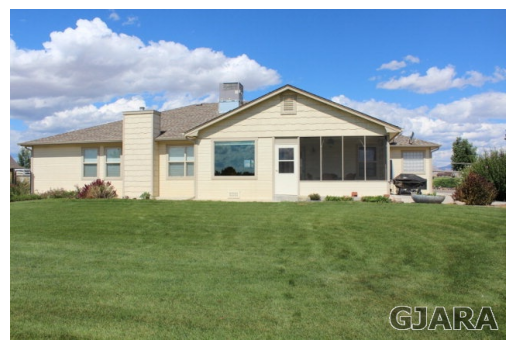

id: 39, distance: 1.4740294218063354, metadata: {'area': 2146, 'number_of_bathrooms': 3, 'number_of_bedrooms': 3, 'price': 455000, 'zipcode': 93446}, document: None
data: houses_dataset/Houses Dataset/40_frontal.jpg


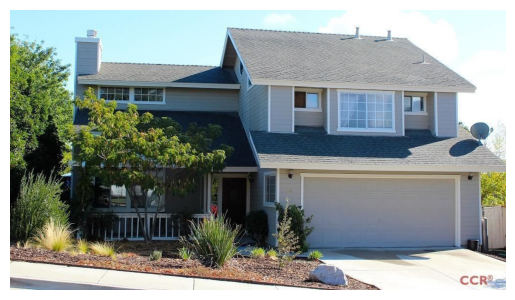

id: 93, distance: 1.5003036260604858, metadata: {'area': 1499, 'number_of_bathrooms': 2, 'number_of_bedrooms': 2, 'price': 539000, 'zipcode': 91901}, document: None
data: houses_dataset/Houses Dataset/94_frontal.jpg


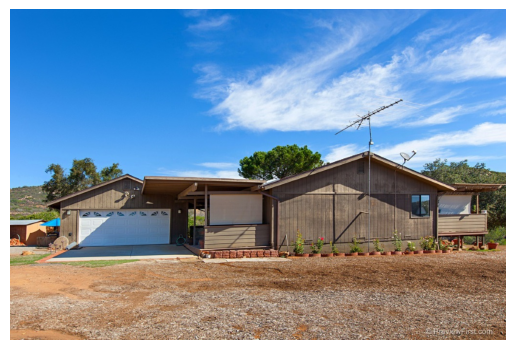

id: 85, distance: 1.5155766010284424, metadata: {'area': 1706, 'number_of_bathrooms': 2, 'number_of_bedrooms': 3, 'price': 529000, 'zipcode': 91901}, document: None
data: houses_dataset/Houses Dataset/86_frontal.jpg


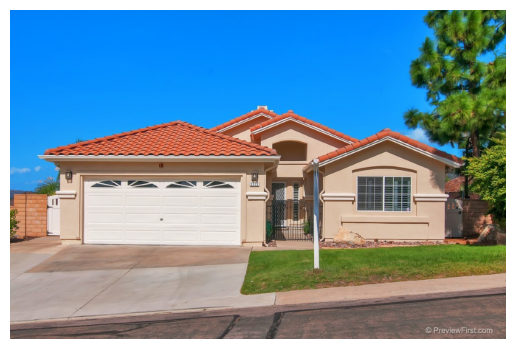

id: 95, distance: 1.5160876512527466, metadata: {'area': 2671, 'number_of_bathrooms': 2, 'number_of_bedrooms': 3, 'price': 521500, 'zipcode': 91901}, document: None
data: houses_dataset/Houses Dataset/96_frontal.jpg


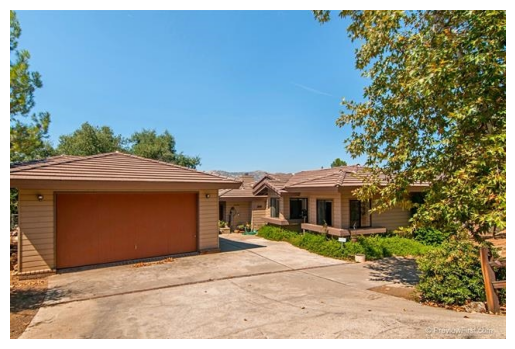

In [35]:
query_texts = [
    'As a home buyer with an elementary-school age child, I want to find a house up to $500,000 located with high quality school access, safe neighborhoods, park proximity, and good resale value in the Denver Colorado area.'
]
num_bedroom = '4'
price = 500000
bound_range = 50000

query_results = multimodal_db.query(
    query_texts=query_texts,
    n_results=5, 
    include=['documents', 'distances', 'metadatas', 'data', 'uris'],
    where={'$and': [
        {'price': {'$gt': price - bound_range}},
        {'price': {'$lt': price + bound_range}}
    ]}  # Options: $eq, $ne, $gt, $gte, $lt, $lte
)

print_query_results(query_texts, query_results)
